# Brazil - No Show Appointment - Deu Migué <a id='topo'></a>

## Table of Contents
<ul>
<li>
    <a href="#intro">Introduction</a>
    <ul>
        <li><a href="#objective">Objective</a></li>
        <li><a href="#columns">Columns descriptions and insights</a></li>
    </ul>
</li>
<li>
    <a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#general">General Properties</a></li>
        <li><a href="#snake">Change columns to snake case</a></li>
        <li><a href="#check_unique">Check unique values</a></li>
        <ul>
            <li><a href="#fix_handcap">Fix handicap</a></li>
        </ul>
        <li><a href="#convert_date">Convert to datetime</a></li>
        <li><a href="#check_date">Check the date fields</a></li>
        <ul>
            <li><a href="#check_schecule_appointment">Check if ScheduledDay > AppointmentDay</a></li>
            <li><a href="#clean_schedule">Clean ScheduledDay > AppointmentDay</a></li>
        </ul>
        <li><a href="#check_appointment">Check AppointmentID</a></li>
        <li><a href="#check_patient">Check PatientId</a></li>
        <li><a href="#no_show">Change no show column</a></li>
        <li><a href="#check_age">Check age</a></li>
        <li><a href="#check_nei">Check neighbourhood</a></li>
        <li><a href="#create_dif">Create column waiting days</a></li>
        <li><a href="#save">Save data cleaned</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul>
    <li><a href="#w_percentage">What the percentage of patients who did not showed up?</a></li>
    <li><a href="#w_age">What ages have more patients who did not showed up?</a></li>
    <ul>
        <li><a href="#divide">Divide in 2 groups, showed up and not showed up</a></li>
        <li><a href="#wc_age">Check age column</a></li>
        <li><a href="#wd_age">Difference between showed up and not showed up</a></li>
        <li><a href="#wn_age">No showed up percentage by age</a></li>
        <li><a href="#wa_age">Answer</a></li>
    </ul>
    <li><a href="#w_gender">Which gender have more patients who did not showed up?</a></li>
    <ul>
        <li><a href="#wa_gender">Answer</a></li>
    </ul>
    <li><a href="#w_school">Does schorlaship have more patients who did not showed up?</a></li>
    <ul>
        <li><a href="#wa_school">Answer</a></li>
    </ul>
    <li><a href="#w_disease">Which disease has more patients who did not showed up?</a></li>
    <ul>
        <li><a href="#wa_disease">Answer</a></li>
    </ul>
    <li><a href="#w_sms">Is sms a important factor to a patient to showed up?</a></li>
    <ul>
        <li><a href="#wa_sms">Answer</a></li>
    </ul>
    <li><a href="#w_days">Does waiting days have some correlation with patients who did not showed up?</a></li>
    <li><a href="#w_time">Wich wait time in days has more patients whod did not showed up?</a></li>
    <li><a href="#w_appoi">What are appointment the periods with more patientes who did not showed up? </a></li>
    <ul>
        <li><a href="#wa_appoi">Answer</a></li>
    </ul>
    <li><a href="#w_local">What are the hospital locations with more patients who dis not showed up?</a></li>
    <ul>
        <li><a href="#wa_local">Answer</a></li>
    </ul>
    <li><a href="#w_maria">Between the ages groups with more higher and lower indices, What is the means percentages of Maria Ortiz hospital patients who did not showed?</a></li>
    <ul>
        <li><a href="#wch_maria">Create age group with more higher index of missing appointments</a></li>
        <li><a href="#wcl_maria">Create age group with more lower index of missing appointments </a></li>
        <li><a href="#wcc_maria">Charts</a></li>
        <li><a href="#wa_maria">Answer</a></li>
    </ul>
</ul>
<li><a href="#conclusions">Conclusions</a></li>
<ul>
    <li><a href="#c_percentage">The percentage of patients who did not showed up</a></li>
    <li><a href="#c_ages">The ages with more patients who did not show up</a></li>
    <ul>
        <li><a href="#c_maria">The means percentages of Maria Ortiz hospital patients who did not show up</a></li>
    </ul>
    <li><a href="#c_gender">Women have indices of no show up more higher</a></li>
    <li><a href="#c_welfare">The scholarship with more patients who did not show up</a></li>
    <li><a href="#c_disease">The disease with more patients who did not show up</a></li>
    <li><a href="#c_sms">SMS is not an important factor to a patient show up</a></li>
    <li><a href="#c_days">Waiting days have correlation with patients who did not show up</a></li>
    <li><a href="#c_local">The hospital locations with more patients who did not show up</a></li>
</ul>
<li><a href="#final">Limitations and final thoughs</a></li>
</ul>

## Introduction <a id='intro'></a>

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

You can download the dataset [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv). Put the file in same directory of this file and rename it to 'brasil_migue.csv'.

### Objective <a id='objective'></a>
The objective of this analysis is to discover some correlations about the reasons of patients that not show up in a scheduled appointment.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
df = pd.read_csv('brasil_migue.csv')

In [123]:
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


## Columns descriptions and insights <a id='columns'></a>

The columns that is not listed below are considered self explained.
- **Scholarship** - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
    - Could indicate the real scholarship of the patient. The information if the patition is in the welfare could be another column.
    
- **ScheduledDay** - The day that the patient set up their appointment. 
    - In the first lines listed above is possible to see some problems in this data, some dates are the same or after the appointment day. The same day is a problem because in brazilian public hospiltals an appointment is scheduled only months before. This data does not seem truthful.

- **Neighbourhood** - The place where the hospital is located and not where the patient lives.
    - A data set with informations about the region could be useful. Only the the name of the place, where the hospital is located, become diffcult to link the place with the reason that the patient does not show up. The location where the patient live could be useful because some hospitals receive patients from another cities.

- **Handcap** - I am considering that the handicap means people with disabilities.

- **No-show** - Yes if the patient does not show up.
    - I could invert the 'yes' data value mean to when the patient showed up. The column name could be showed up in this case. This could avoid misunderstood.
    
- **SMS_received** - If the patient received a sms remembering about the appointment.
    - I have doubts about if this data is relevant. There is some reasons about my doubts that I am going to try to explain below:
        - This system of reminder is not common in Brazil
        - Some patients are enrolled in the welfare program Bolsa Família. Most certain that they do not have cellphones. This can be cheked more later in the data analysis.
        - The data do not explain when the sms was received.

> **Note**: The insights above are only my first impressions about the data. I am going to do a more profund analysis later in this document.  

## Data Wrangling <a id='wrangling'/>

### General Properties <a id='general'></a>
Display all the info about the data. <a href='#topo'>Top</a>

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing values in the data frame. Let's check if has duplicates values

In [125]:
sum(df.duplicated())

0

### Change columns to snake case <a id="snake"/>
I am going to change the columns to snake case to become more easy to explore the data set. <a href='#topo'>Top</a>

In [126]:
import data_frame_helper

In [127]:
data_frame_helper.columns_to_snake_case(df).columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

In [128]:
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

### Check unique values <a id='check_unique'></a>
The columns below should just have two possible values each. Let's check if is allright with the unique function. <a href='#topo'>Top</a>

In [129]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [130]:
df.scholarship.unique()

array([0, 1], dtype=int64)

In [131]:
df.hipertension.unique()

array([1, 0], dtype=int64)

In [132]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [133]:
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [134]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [135]:
df.sms_received.unique()

array([0, 1], dtype=int64)

In [136]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

#### Fix handicap <a id='fix_handcap'/>
According with the data set documentation, the Handcap column should be true or false. I am going to transform handicaps greater than 1 to become 1. <a href='#topo'>Top</a>

In [137]:
df.handcap = df.handcap.apply(lambda x: 1 if x > 1 else x)
df.handcap.unique()

array([0, 1], dtype=int64)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Convert to datetime <a id='convert_date'></a>
First, let's convert to datetime the scheduled day and appointment day column. <a href='#topo'>Top</a>

In [139]:
df.scheduled_day = pd.to_datetime(df.scheduled_day).dt.normalize()
df.appointment_day = pd.to_datetime(df.appointment_day)

In [140]:
df.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


### Check the date fields <a id='check_date'></a>
How we see before, the data set has some inconsistent data in the date fields, Scheduled Day and Appointment Day. Let's check with more details in the steps below. <a href='#topo'>Top</a>

#### Check if ScheduledDay > AppointmentDay <a id='check_schecule_appointment'></a>
I want to check how many Scheduled days are after the AppointmentDay. <a href='#topo'>Top</a>

In [142]:
df.query('scheduled_day > appointment_day')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [143]:
sum(df.scheduled_day > df.appointment_day)

5

The dataset has values with scheduled day after the appointment day, but just five rows.

#### Clean ScheduledDay > AppointmentDay <a id='clean_schedule'></a>
I am goint to remove the datas with ScheduledDay > AppointmentDay. <a href='#topo'>Top</a>

In [144]:
df = df.query('scheduled_day <= appointment_day')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110522 non-null float64
appointment_id     110522 non-null int64
gender             110522 non-null object
scheduled_day      110522 non-null datetime64[ns]
appointment_day    110522 non-null datetime64[ns]
age                110522 non-null int64
neighbourhood      110522 non-null object
scholarship        110522 non-null int64
hipertension       110522 non-null int64
diabetes           110522 non-null int64
alcoholism         110522 non-null int64
handcap            110522 non-null int64
sms_received       110522 non-null int64
no_show            110522 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


### Check AppointmentID <a id='check_appointment'></a>
Beforehand, I am goind to check if the data has Appointment id duplicated. <a href='#topo'>Top</a>

In [146]:
df.appointment_id.duplicated().sum()

0

### Check PatientId <a id='check_patient'></a>
Maybe the patient can have more than one appointment. Let's check. <a href='#topo'>Top</a>

In [147]:
# Must be true to has more than one appointment
len(df.patient_id.unique()) != len(df.patient_id)

True

The data has patients with more than one appointment. Let's check how many PatientId are duplicated

In [148]:
df.patient_id.duplicated().sum()

48223

I am going to check the mean, min and max appointment quantity by patient

In [149]:
df.groupby(['patient_id']).count().appointment_id.describe(percentiles=[.25, .5, .75, .85, .90, .95, .98, .99, 1])

count    62299.000000
mean         1.774057
std          1.770219
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
85%          3.000000
90%          3.000000
95%          4.000000
98%          6.000000
99%          8.000000
100%        88.000000
max         88.000000
Name: appointment_id, dtype: float64

The mean is 1.56 but Seems that some patients has 30 appointments. Let's  check these patients

In [150]:
index = df.groupby(['patient_id']).count().query('appointment_id == 30').index.tolist()
index

[6128878448536.0, 416755661551767.0]

Just one patient has 30 appointments

In [151]:
df.query('patient_id == {}'.format(index))

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3005,4.167557e+14,5638977,M,2016-04-29,2016-04-29,33,BONFIM,0,0,0,0,0,0,No
3063,4.167557e+14,5641054,M,2016-04-29,2016-04-29,33,BONFIM,0,0,0,0,0,0,No
3104,4.167557e+14,5642799,M,2016-04-29,2016-04-29,33,BONFIM,0,0,0,0,0,0,No
7115,6.128878e+12,5736809,F,2016-05-25,2016-05-25,51,PRAIA DO CANTO,0,0,0,0,0,0,No
7118,4.167557e+14,5711893,M,2016-05-18,2016-05-18,33,BONFIM,0,0,0,0,0,0,No
7153,6.128878e+12,5719600,F,2016-05-19,2016-05-19,51,PRAIA DO CANTO,0,0,0,0,0,0,No
7289,4.167557e+14,5691240,M,2016-05-12,2016-05-12,33,BONFIM,0,0,0,0,0,0,No
7295,6.128878e+12,5737698,F,2016-05-25,2016-05-31,51,PRAIA DO CANTO,0,0,0,0,0,1,No
7302,6.128878e+12,5724897,F,2016-05-20,2016-05-25,51,PRAIA DO CANTO,0,0,0,0,0,1,No
7388,4.167557e+14,5692772,M,2016-05-12,2016-05-19,33,BONFIM,0,0,0,0,0,0,Yes


### Change no show column <a id='no_show'/>
In the column no show, the values Yes means that the patient no showed up. Let's change the values to means that 1 is when the patient showed up and 0 not. I am going to change the column name to showed up to avoid misunderstood. <a href='#topo'>Top</a>

In [152]:
import brasil_migue as brm

In [153]:
df.no_show.head(4)

0    No
1    No
2    No
3    No
Name: no_show, dtype: object

In [154]:
brm.invert_no_show_values(df).showed_up.head(4)

0    1
1    1
2    1
3    1
Name: showed_up, dtype: int64

In [155]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'showed_up'],
      dtype='object')

### Check age <a id='check_age'/>
I am going to check the column age. <a href='#topo'>Top</a>

In [156]:
df.age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [157]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1628
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1544
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      433
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

As we can see above, there is some values with age == 0. I can imagine that is a child with just months of live. I am going to check if data is ok for this case.

In [158]:
df.query('age == 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
59,7.184428e+13,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,1
63,2.366233e+14,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,1
64,1.885174e+14,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,1
65,2.718818e+14,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,1
67,8.647128e+13,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,1
89,4.314932e+14,5640380,M,2016-04-29,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,1
101,6.822847e+13,5642813,M,2016-04-29,2016-04-29,0,BONFIM,0,0,0,0,0,0,1
104,3.326985e+12,5632495,F,2016-04-28,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,0
132,8.468587e+14,5560742,M,2016-04-08,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,0
150,5.392419e+10,5641476,M,2016-04-29,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,1


Seems alright. Let's check the ages avaliable in the data set.

In [159]:
ages = df.age.unique()
ages.sort()
ages

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

We have all the ages, with no interruption, until 98 years old.

### Check neighbourhood <a id='check_nei'/>
 The column neighbourhood could have values duplicated with different cases. Let's check it. <a href='#topo'>Top</a>

In [160]:
df.neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

### Create column waiting days <a id='create_dif'/>
I am going to create a new column the store the patient waiting days. <a href='#topo'>Top</a>

In [161]:
df.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1


In [162]:
days_time = df.appointment_day - df.scheduled_day
days = days_time / np.timedelta64(1, 'D')
days = days.astype(int)

In [163]:
df.insert(df.columns.get_loc('appointment_day') + 1, 'waiting_days', days)

In [164]:
df.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110522 non-null float64
appointment_id     110522 non-null int64
gender             110522 non-null object
scheduled_day      110522 non-null datetime64[ns]
appointment_day    110522 non-null datetime64[ns]
waiting_days       110522 non-null int32
age                110522 non-null int64
neighbourhood      110522 non-null object
scholarship        110522 non-null int64
hipertension       110522 non-null int64
diabetes           110522 non-null int64
alcoholism         110522 non-null int64
handcap            110522 non-null int64
sms_received       110522 non-null int64
showed_up          110522 non-null int64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(9), object(2)
memory usage: 13.1+ MB


In [166]:
df.waiting_days.describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

In [167]:
df.waiting_days.value_counts()

0      38563
2       6725
4       5290
1       5213
7       4906
6       4037
5       3277
14      2913
3       2737
8       2332
21      1861
28      1706
13      1682
9       1605
15      1503
10      1391
20      1187
22      1173
16      1151
12      1115
17      1107
29      1089
19      1044
18      1021
27      1013
11       987
35       963
23       822
34       808
26       731
       ...  
103        5
109        5
111        5
98         5
95         5
112        5
108        5
96         4
102        4
105        4
119        4
92         3
122        3
107        2
115        2
93         2
94         2
97         2
110        2
126        1
125        1
123        1
117        1
139        1
82         1
101        1
132        1
151        1
146        1
127        1
Name: waiting_days, Length: 129, dtype: int64

### Save data cleaned <a id='save'/>
I am going to save the data cleaned. <a href='#topo'>Top</a>

In [168]:
df.to_csv('brasil_migue_v2.csv')

## Exploratory Data Analysis <a id='eda'/>

Now is time to explore some correlations between patients that do not show up in your appointments. <a href='#topo'>Top</a>

### What the percentage of patients who did not showed up? <a id='w_percentage'/>
First. I want to know how many patients are missing your appointment. <a href='#topo'>Top</a> - <a href='#c_percentage'>Conclusion</a>

In [169]:
not_showed_up = df.query('showed_up == 0').showed_up.count()
not_showed_up_percentage = (not_showed_up / df.showed_up.count()) * 100
not_showed_up_percentage

20.18964550044335

20.19% patients do not showed up. 

### What ages have more patients who did not showed up? <a id='w_age'/>
First I am going to divide the dataframe in 2 groups, the showed up and the not shoewd up. <a href='#topo'>Top</a>

#### Divide in 2 groups, showed up and not showed up <a id='divide'/> <a href='#topo'>Top</a>

In [170]:
df_not_showed_up = df.query('showed_up == 0')
df_showed_up = df.query('showed_up == 1')

In [171]:
df_not_showed_up.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,2,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,2,39,GOIABEIRAS,0,0,0,0,0,0,0
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,3,29,NOVA PALESTINA,0,0,0,0,0,1,0
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,1,40,CONQUISTA,1,0,0,0,0,0,0


In [172]:
df_showed_up.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1


#### Check age column <a id='wc_age'/> <a href='#topo'>Top</a>

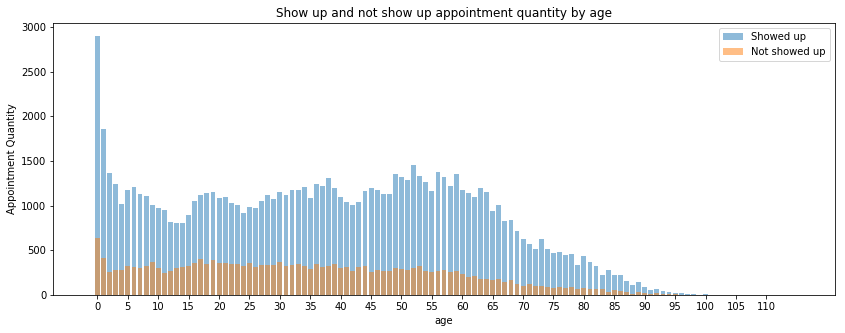

In [173]:
plt.figure(figsize=(14, 5))
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'age')
plt.xticks(np.arange(df_showed_up.age.min()+1, df_showed_up.age.max(), 5))
plt.title('Show up and not show up appointment quantity by age')
plt.show()

##### Difference between showed up and not showed up <a id='wd_age'/>
I am going to plot just the difference between showed up and not showed up. <a href='#topo'>Top</a>

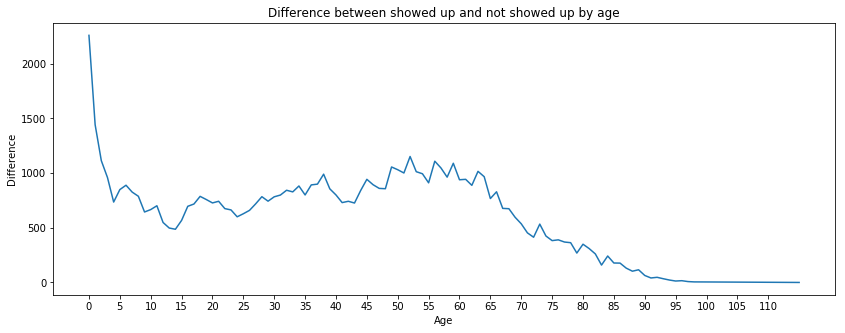

In [174]:
plt.figure(figsize=(14, 5))
count_dif = brm.get_counts_difference(df_showed_up, df_not_showed_up, 'age', sort_index=True)
plt.plot(count_dif.keys(), count_dif.values)
plt.xticks(np.arange(min(count_dif.keys()), max(count_dif.keys()), 5))
plt.ylabel('Difference')
plt.xlabel('Age')
plt.title('Difference between showed up and not showed up by age')
plt.show()

##### No showed up percentage by age <a id='wn_age'/>
Let's plot the percentage of no showed up by age. I am going to plot a line to delimit what age pass the total of no showed up percentage. <a href='#topo'>Top</a>

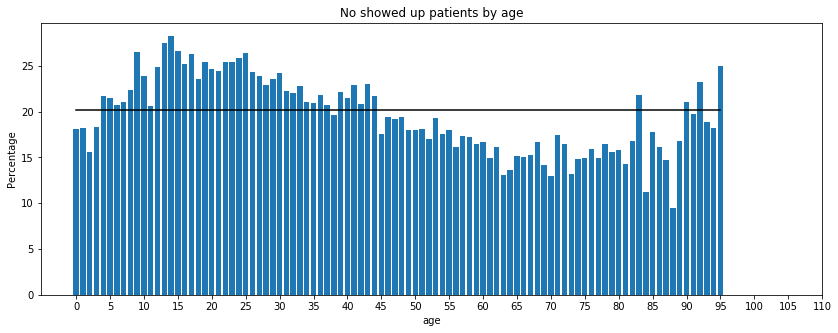

In [175]:
plt.figure(figsize=(14, 5))
min_appointment_count = 3
percentages = brm.build_no_showed_up_percentage_bar(plt, df, df_not_showed_up, not_showed_up_percentage, 'age', min_appointment_count)
plt.xticks(np.arange(df_not_showed_up.age.min(), df_not_showed_up.age.max(), 5))
plt.show()

#### Answer <a id='wa_age'/>
I am going to get the ages that passed the total of no showed up percentage. <a href='#topo'>Top</a> - <a href='#c_ages'>Conclusion</a>

In [176]:
ages_not_showed_up = percentages.loc[lambda x: x > not_showed_up_percentage].keys()
ages_not_showed_up

Int64Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            39, 40, 41, 42, 43, 44, 83, 90, 92, 95],
           dtype='int64')

### Which gender have more patients who did not showed up? <a id='w_gender'/> <a href='#topo'>Top</a>

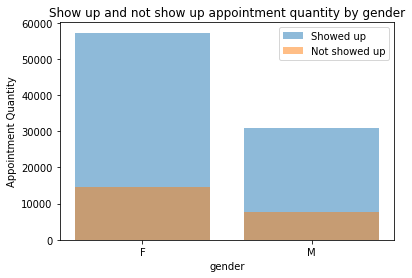

In [177]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'gender')
plt.title('Show up and not show up appointment quantity by gender')
plt.show()

#### Answer <a id='wa_gender'/> <a href='#topo'>Top</a> - <a href='#c_gender'>Conclusion</a>

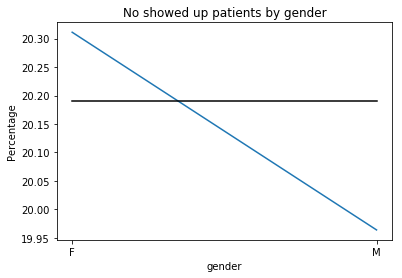

In [178]:
brm.build_no_showed_up_percentage_plot(plt, df, df_not_showed_up, not_showed_up_percentage, 'gender');

### Does schorlaship have more patients who did not showed up? <a id='w_school'/> <a href='#topo'>Top</a>

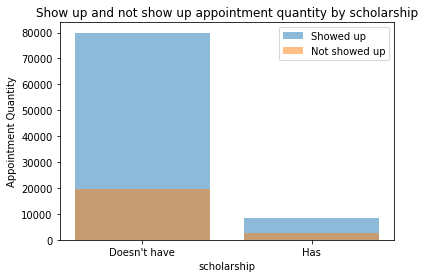

In [179]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'scholarship')
plt.title('Show up and not show up appointment quantity by scholarship')
plt.xticks([0, 1], ["Doesn't have", 'Has'])
plt.show()

#### Answer <a id='wa_school'/> <a href='#topo'>Top</a> - <a href='#c_welfare'>Conclusion</a>

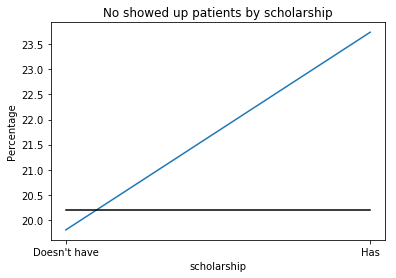

In [180]:
brm.build_no_showed_up_percentage_plot(plt, df, df_not_showed_up, not_showed_up_percentage, 'scholarship')
plt.xticks([0, 1], ["Doesn't have", 'Has'])
plt.show()

### Which disease has more patients who did not showed up? <a id='w_disease'/> <a href='#topo'>Top</a>

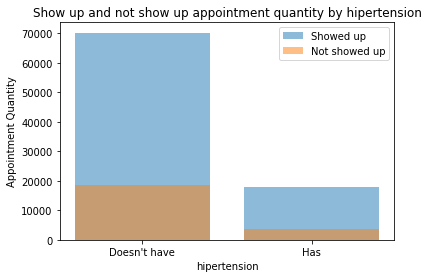

In [181]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'hipertension')
plt.title('Show up and not show up appointment quantity by hipertension')
plt.xticks([0, 1], ["Doesn't have", 'Has'])
plt.show()

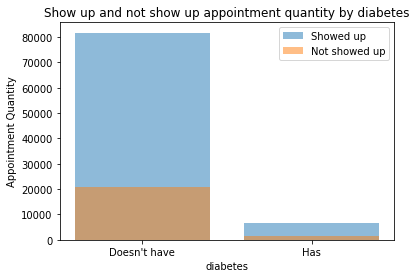

In [182]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'diabetes')
plt.title('Show up and not show up appointment quantity by diabetes')
plt.xticks([0, 1], ["Doesn't have", 'Has'])
plt.show()

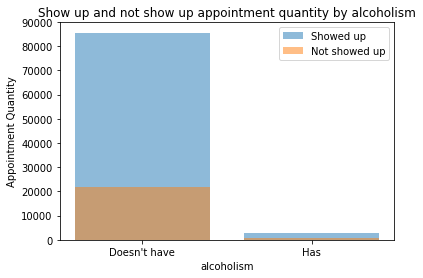

In [183]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'alcoholism')
plt.title('Show up and not show up appointment quantity by alcoholism')
plt.xticks([0, 1], ["Doesn't have", 'Has'])
plt.show()

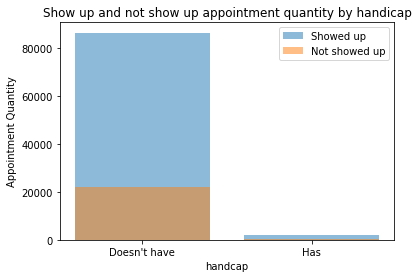

In [184]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'handcap')
plt.title('Show up and not show up appointment quantity by handicap')
plt.xticks([0, 1], ["Doesn't have", 'Has'])
plt.show()

In [185]:
hipertension_percentage = brm.get_no_showed_up_percentages(df, df_not_showed_up, 'hipertension')
hipertension_percentage

0    20.899223
1    17.301959
Name: hipertension, dtype: float64

In [186]:
diabetes_percentage = brm.get_no_showed_up_percentages(df, df_not_showed_up, 'diabetes')
diabetes_percentage

0    20.358943
1    18.003273
Name: diabetes, dtype: float64

In [187]:
alcoholism_percentage = brm.get_no_showed_up_percentages(df, df_not_showed_up, 'alcoholism')
alcoholism_percentage

0    20.190926
1    20.148810
Name: alcoholism, dtype: float64

In [188]:
handcap_percentage = brm.get_no_showed_up_percentages(df, df_not_showed_up, 'handcap')
handcap_percentage

0    20.233093
1    18.088432
Name: handcap, dtype: float64

#### Answer  <a id='wa_disease'/> <a href='#topo'>Top</a> - <a href='#c_disease'>Conclusion</a>

In [189]:
disease_percentages = [hipertension_percentage[1], diabetes_percentage[1], alcoholism_percentage[1], handcap_percentage[1]]
diseases = ['hiper', 'diab', 'alco', 'hand']
percentages = pd.Series(disease_percentages, diseases)

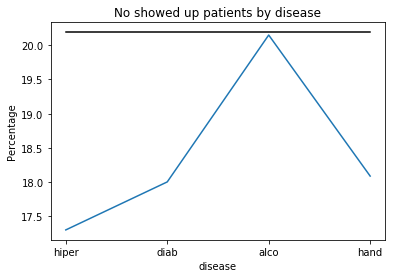

In [190]:
brm.build_no_showed_up_percentage_plot(plt, df, df_not_showed_up, not_showed_up_percentage, 'disease', percentages=percentages);

### Is sms a important factor to a patient to showed up? <a id='w_sms'/> <a href='#topo'>Top</a>

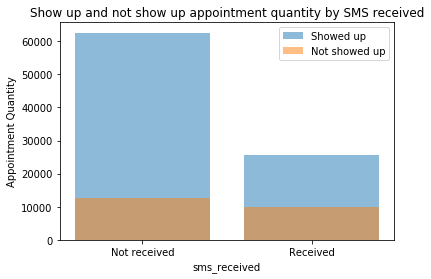

In [191]:
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'sms_received')
plt.title('Show up and not show up appointment quantity by SMS received')
plt.xticks([0, 1], ['Not received', 'Received'])
plt.show()

#### Answer <a id='wa_sms'/> <a href='#topo'>Top</a> - <a href='#c_sms'>Conclusion</a>

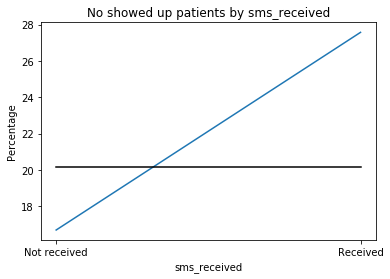

In [192]:
brm.build_no_showed_up_percentage_plot(plt, df, df_not_showed_up, not_showed_up_percentage, 'sms_received')
plt.xticks([0, 1], ['Not received', 'Received'])
plt.show()

### Does waiting days have some correlation with patients who did not showed up? <a id='w_days'/> <a href='#topo'>Top</a>

#### Answer <a href='#c_days'>Conclusion</a>

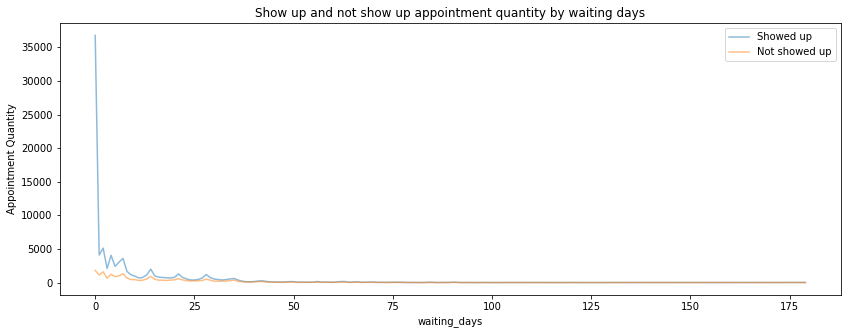

In [193]:
plt.figure(figsize=(14, 5))
brm.build_column_plot(plt, df_showed_up, df_not_showed_up, 'waiting_days')
plt.title('Show up and not show up appointment quantity by waiting days')
plt.show()

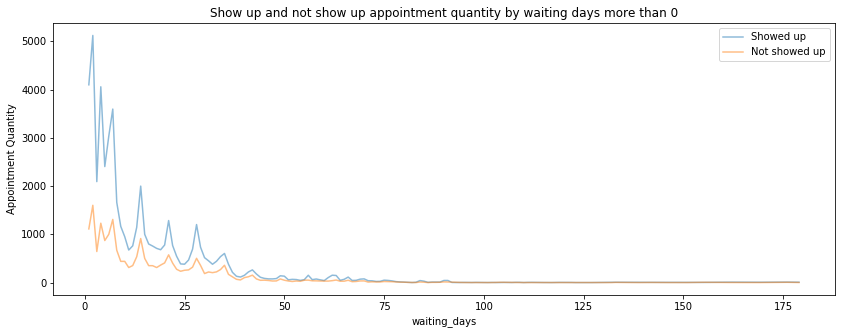

In [194]:
plt.figure(figsize=(14, 5))
brm.build_column_plot(plt, df_showed_up.query('waiting_days > 0'), df_not_showed_up.query('waiting_days > 0'), 'waiting_days')
plt.title('Show up and not show up appointment quantity by waiting days more than 0')
plt.show()

### Wich wait time in days has more patients who did not showed up?  <a id='w_time'/> <a href='#topo'>Top</a> - <a href='#c_days'>Conclusion</a>

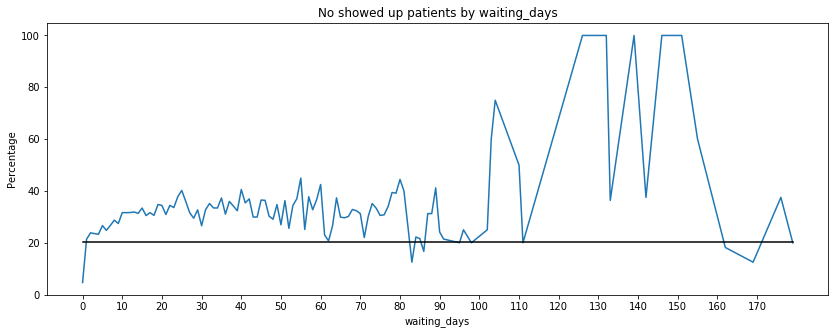

In [195]:
plt.figure(figsize=(14, 5))
percentages = brm.build_no_showed_up_percentage_plot(plt, df, df_not_showed_up, not_showed_up_percentage, 'waiting_days')
plt.xticks(np.arange(min(percentages.keys()), max(percentages.keys()), 10))
plt.show()

### What are appointment the periods with more patientes who did not showed up? <a id='w_appoi'/> <a href='#topo'>Top</a>

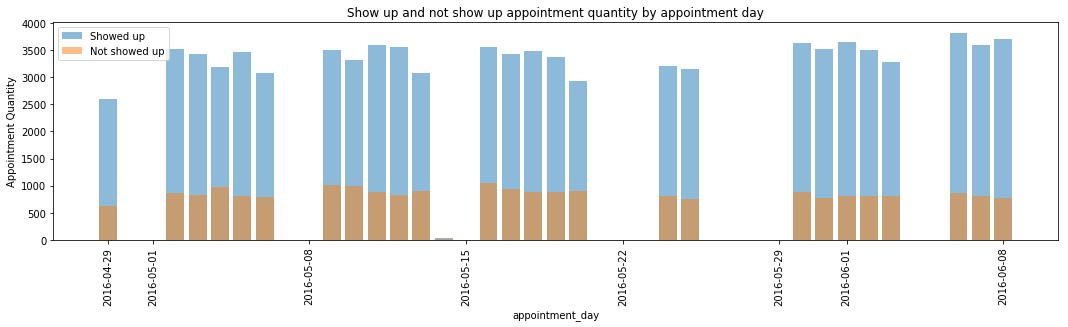

In [196]:
plt.figure(figsize=(18, 4))
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'appointment_day')
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 90)
plt.title('Show up and not show up appointment quantity by appointment day')
plt.show()

#### Answer  <a id='wa_appoi'/> <a href='#topo'>Top</a>

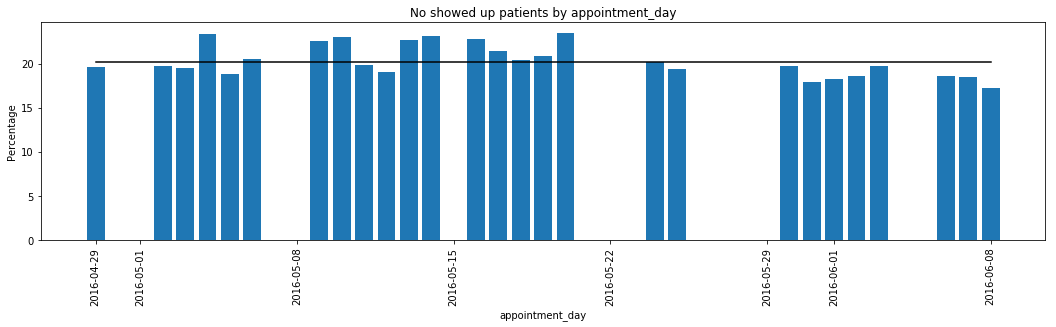

In [197]:
plt.figure(figsize=(18, 4))
brm.build_no_showed_up_percentage_bar(plt, df, df_not_showed_up, not_showed_up_percentage, 'appointment_day')
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 90)
plt.show()

### What are the hospital locations with more patients who dis not showed up?  <a id='w_local'/> <a href='#topo'>Top</a>

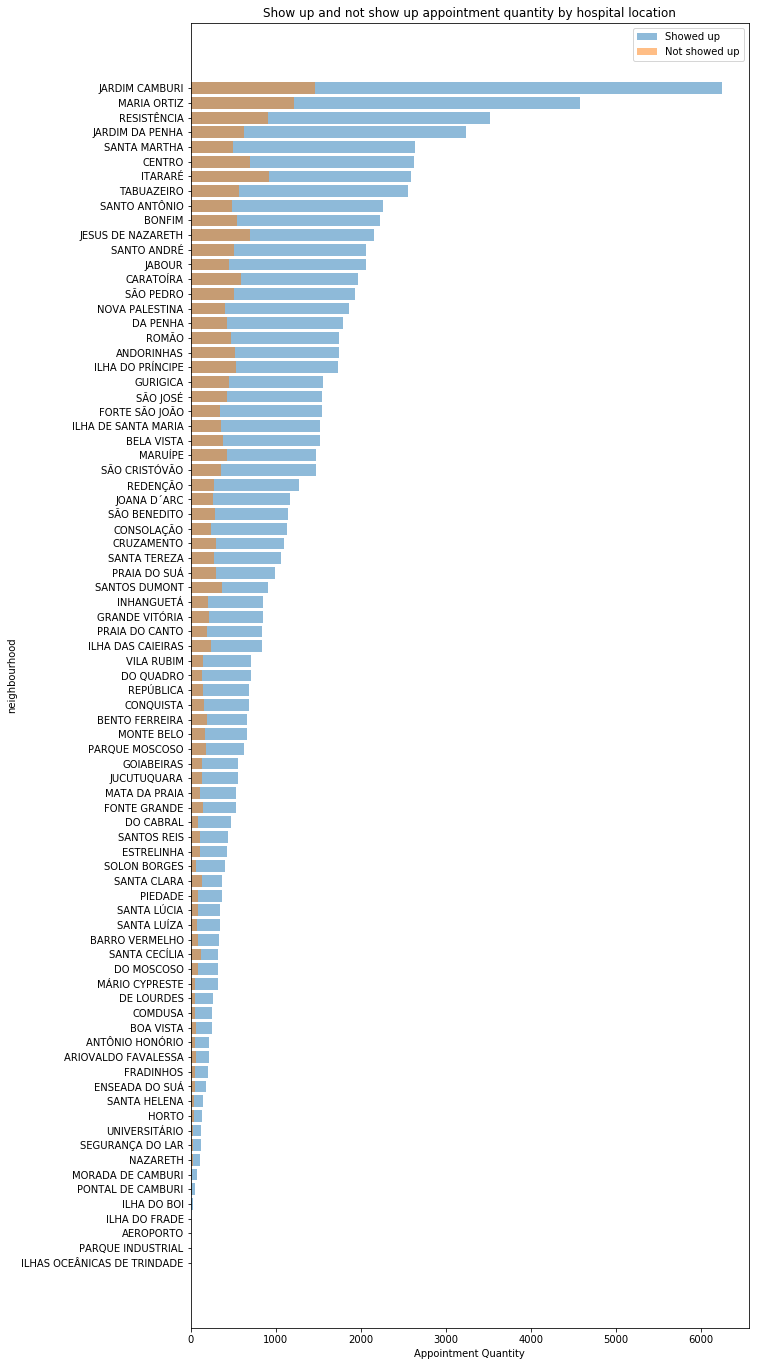

In [198]:
plt.figure(figsize=(10, 24))
brm.build_column_bar_chart(plt, df_showed_up, df_not_showed_up, 'neighbourhood', invert_axis=True)
plt.title('Show up and not show up appointment quantity by hospital location')
plt.show()

#### Answer  <a id='wa_local'/> <a href='#topo'>Top</a> - <a href='#c_local'>Conclusion</a>

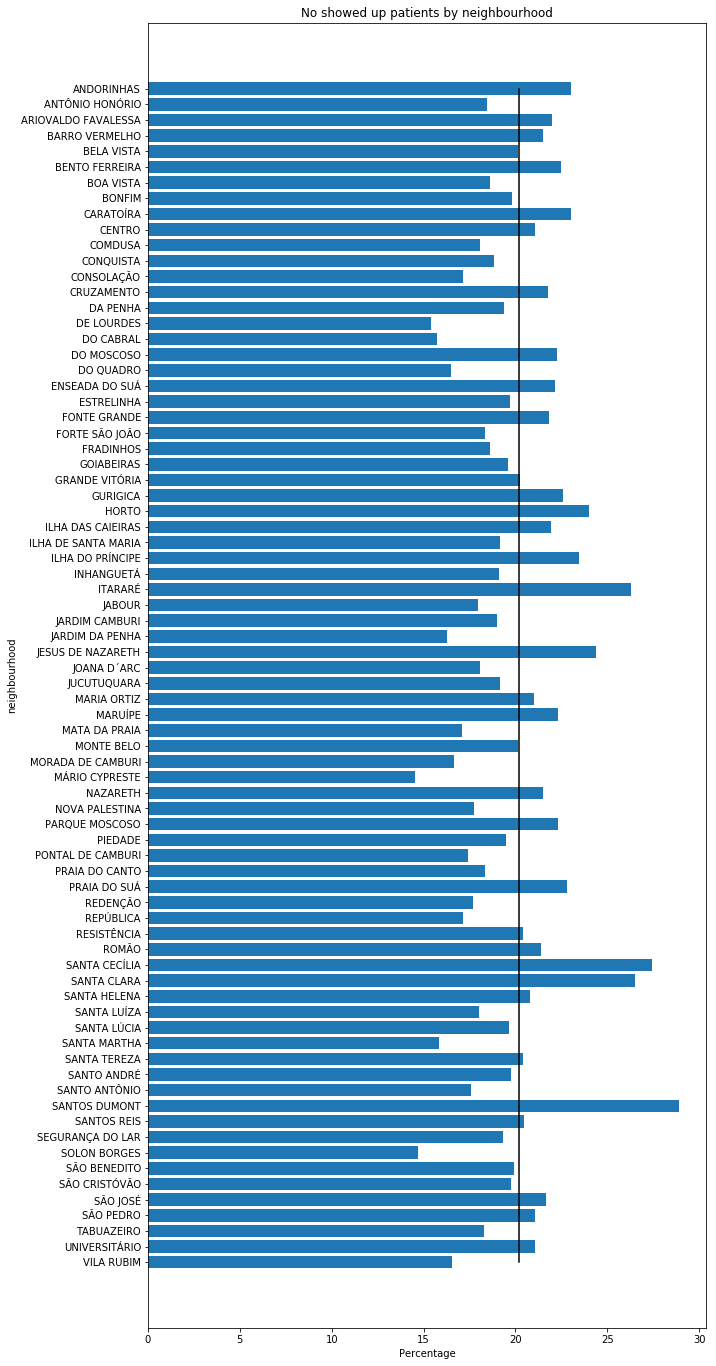

In [199]:
plt.figure(figsize=(10, 24))
brm.build_no_showed_up_percentage_bar(plt, df, df_not_showed_up, not_showed_up_percentage, 'neighbourhood', min_appointment_count=5, invert_axis=True)
plt.show()

### Between the ages groups with more higher and lower indices, What is the means percentages of Maria Ortiz hospital patients who did not showed? <a id='w_maria'/> <a href='#topo'>Top</a>

In [200]:
ages_not_showed_up

Int64Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            39, 40, 41, 42, 43, 44, 83, 90, 92, 95],
           dtype='int64')

#### Create age group with more higher index of missing appointments <a id='wch_maria'/> <a href='#topo'>Top</a>

In [201]:
age_query_high_array = [ 'age == "{}" | '.format(age) if i[0] != len(ages_not_showed_up.values)-1 else 'age == "{}"'.format(age) for i, age in np.ndenumerate(ages_not_showed_up.values)]
age_high_query = ''.join(age_query_high_array)
age_high_query

'age == "4" | age == "5" | age == "6" | age == "7" | age == "8" | age == "9" | age == "10" | age == "11" | age == "12" | age == "13" | age == "14" | age == "15" | age == "16" | age == "17" | age == "18" | age == "19" | age == "20" | age == "21" | age == "22" | age == "23" | age == "24" | age == "25" | age == "26" | age == "27" | age == "28" | age == "29" | age == "30" | age == "31" | age == "32" | age == "33" | age == "34" | age == "35" | age == "36" | age == "37" | age == "39" | age == "40" | age == "41" | age == "42" | age == "43" | age == "44" | age == "83" | age == "90" | age == "92" | age == "95"'

In [202]:
df_local_age_high = df.query('neighbourhood == "MARIA ORTIZ" & ({})'.format(age_high_query))
df_local_age_high.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
78,6.259265e+11,5597672,M,2016-04-18,2016-04-29,11,21,MARIA ORTIZ,0,0,0,0,0,1,1
143,4.755763e+12,5641034,F,2016-04-29,2016-04-29,0,36,MARIA ORTIZ,0,0,0,0,0,0,1
262,2.621687e+11,5637980,F,2016-04-29,2016-04-29,0,37,MARIA ORTIZ,0,0,0,0,0,0,1
264,1.971196e+13,5638572,F,2016-04-29,2016-04-29,0,21,MARIA ORTIZ,0,0,0,0,0,0,1


In [203]:
df_local_age_high_not_showed_up = df_local_age_high.query('showed_up == 0')
df_local_age_high_not_showed_up.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
546,5.816229e+12,5552638,F,2016-04-06,2016-04-29,23,26,MARIA ORTIZ,0,0,0,0,0,1,0
547,1.971196e+13,5536363,F,2016-04-01,2016-04-29,28,21,MARIA ORTIZ,0,0,0,0,0,1,0


#### Create age group with more lower index of missing appointments <a id='wcl_maria'/> <a href='#topo'>Top</a>

In [204]:
age_query_low_array = [ 'age != "{}" & '.format(age) if i[0] != len(ages_not_showed_up.values)-1 else 'age != "{}"'.format(age) for i, age in np.ndenumerate(ages_not_showed_up.values)]
age_low_query = ''.join(age_query_low_array)
age_low_query

'age != "4" & age != "5" & age != "6" & age != "7" & age != "8" & age != "9" & age != "10" & age != "11" & age != "12" & age != "13" & age != "14" & age != "15" & age != "16" & age != "17" & age != "18" & age != "19" & age != "20" & age != "21" & age != "22" & age != "23" & age != "24" & age != "25" & age != "26" & age != "27" & age != "28" & age != "29" & age != "30" & age != "31" & age != "32" & age != "33" & age != "34" & age != "35" & age != "36" & age != "37" & age != "39" & age != "40" & age != "41" & age != "42" & age != "43" & age != "44" & age != "83" & age != "90" & age != "92" & age != "95"'

In [205]:
df_local_age_low = df.query('neighbourhood == "MARIA ORTIZ" & ({})'.format(age_low_query))
df_local_age_low.head(4)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
74,9.672968e+12,5597628,F,2016-04-18,2016-04-29,11,64,MARIA ORTIZ,0,0,0,0,0,1,1
79,9.912882e+13,5597673,M,2016-04-18,2016-04-29,11,67,MARIA ORTIZ,0,0,0,0,0,1,0
144,1.758328e+14,5640987,M,2016-04-29,2016-04-29,0,50,MARIA ORTIZ,0,0,0,0,0,0,1
261,6.727362e+13,5637684,F,2016-04-29,2016-04-29,0,74,MARIA ORTIZ,0,1,1,0,0,0,1


In [206]:
df_local_age_low_not_showed_up = df_local_age_low.query('showed_up == 0')
df_local_age_low_not_showed_up.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
79,9.912882e+13,5597673,M,2016-04-18,2016-04-29,11,67,MARIA ORTIZ,0,0,0,0,0,1,0
739,1.428839e+13,5498944,F,2016-03-22,2016-04-29,38,1,MARIA ORTIZ,0,0,0,0,0,1,0


#### Charts <a id='wcc_maria'/> <a href='#topo'>Top</a>

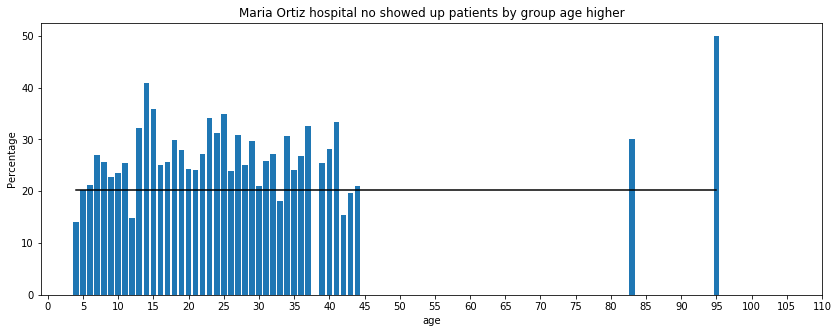

In [207]:
plt.figure(figsize=(14, 5))
percentages_high = brm.build_no_showed_up_percentage_bar(plt, df_local_age_high, df_local_age_high_not_showed_up, not_showed_up_percentage, 'age')
plt.xticks(np.arange(df_not_showed_up.age.min(), df_not_showed_up.age.max(), 5))
plt.title('Maria Ortiz hospital no showed up patients by group age higher')
plt.show()

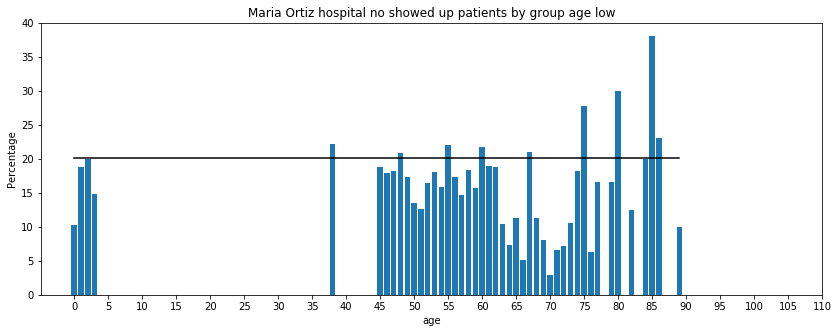

In [208]:
plt.figure(figsize=(14, 5))
percentages_low = brm.build_no_showed_up_percentage_bar(plt, df_local_age_low, df_local_age_low_not_showed_up, not_showed_up_percentage, 'age')
plt.xticks(np.arange(df_not_showed_up.age.min(), df_not_showed_up.age.max(), 5))
plt.title('Maria Ortiz hospital no showed up patients by group age low')
plt.show()

#### Answer <a id='wa_maria'/> <a href='#topo'>Top</a> - <a href='#c_maria'>Conclusion</a>

In [209]:
percentages_high.mean()

26.83804374610176

In [210]:
percentages_low.mean()

16.107222054852233

## Conclusions <a id='conclusions'/>
The exploratory section had the objective to search evidences that colud discover some correlations about the reasons of patients that not show up in a scheduled appointment. I am going to divide this conclusion to try to answer the questions made in last section.  <a href='#topo'>Top</a>

### The percentage of patients who did not showed up <a id='c_percentage'/>
Almost 20.19% of the patients did not show up in your scheduled appointments. The dataset's document said that was 30%. This question was important to confront the  dataset's document info. The next questions was focused these 20.19% of the patients. <a href='#topo'>Top</a> - <a href='#w_percentage'>Answer</a>

### The ages with more patients who did not show up <a id='c_ages'/>
The 20.19% found in the last question was used as delimited to get the ages with more higher indices of missing appointments. So, I got the ages greater than 20.19%. This 20.19% used as delimited was used in all the next questions.

With these results was possibled to discover some correlations the patients who did not show up. Between 4 to 44 and some ages after 82 years old, the indices of abstencion is more higher where some ages can reach almost 30% of no show. <a href='#topo'>Top</a> - <a href='#wa_age'>Answer</a>

#### The means percentages of Maria Ortiz hospital patients who did not show up <a id='c_maria'/>
The Maria Ortiz's hospital is one of have the number of appointments and the percentage of abstention more higher. This hospital of the neighborhood was choosed to confirm the correlation found in the ages. In this case was possibled to see with more detail the correlation with the ages. Insige of the age group that have indices more higher of no show, the mean percentage of abstention is 26.83% against 16.10% of the another age group. <a href='#topo'>Top</a> - <a href='#wa_maria'>Answer</a>

### Women have indices of no show up more higher <a id='c_gender'/>
Women have more scheduled appoints than men, but men seems to show up more. Women has almost 20.30% of no show against almost 20% of men. <a href='#topo'>Top</a> - <a href='#wa_gender'>Answer</a>

### The scholarship with more patients who did not show up <a id='c_welfare'/>
Only a few of patients is participating  in the Bolsa Família welfare program. The patients inside this welfare has almost 24% of abstention. More higher than the delimited percentage of 20.19%. <a href='#topo'>Top</a> - <a href='#wa_school'>Answer</a>

### The disease with more patients who did not show up <a id='c_disease'/>
The diseases do not have any correlation with patients that not showed up. None passed by delimeted percentage. The only almost close of 20.19%, that could have some correlation, is alcoholism. <a href='#topo'>Top</a> - <a href='#wa_disease'>Answer</a>

### SMS is not an important factor to a patient show up <a id='c_sms'/>
The trend was that patients who received sms remenbering of your appointment had an index of show up more higher. But it is not the case. The number of patients who received SMS is much lower and the percentage of abstention reach almost 28%. <a href='#topo'>Top</a> - <a href='#wa_sms'>Answer</a>

### Waiting days have correlation with patients who did not show up <a id='c_days'/>
The number of appointments decreases while the waiting days increase, but is possible to see that the percentage of patients who did not show up increase. <a href='#w_time'>This chart</a> show that when the number of waiting days pass 1 day, the percentage of abstention already pass the delimeted percentage of 20.19%. <a href='#topo'>Top</a> - <a href='#w_days'>Answer</a>

### The hospital locations with more patients who did not show up <a id='c_local'/>
This info has some limitations. Is not possible to know if the hospital location is a city, neighborhood or district. If the data is really the neighborhood, is not possible to know which city this neighborhood belongs. In this case is not possible to do correlations with the patients who did not show up because some patients needs to go to another city to be attended. More detail about the hospital location and the local where the patient lives could help.
<a href='#topo'>Top</a> - <a href='#wa_local'>Answer</a>

## Limitations and final thoughs <a id='final'/>

With this dataset, the main objective of this document of discovering some correlations about the reasons of patients who did not show up in a scheduled appointment, is not possible. The dataset lack with necessary information.

The diseases informations do not give any insight. The dataset do not say to us what kind of medical appointment is the data. So, a patient with diabetes could schedule a medical appointment that don not have anything to do with his diesease.

The dataset do not show if the appointment is in the public or private health service. We have the information if the patient is enrolled the goverment welfare program that could indicate if the data is about the public health service, but it is just a guess.

We do not have valuable information about the patient. Where does the patient live? What is your education level? Do the teenagers patients have your complete family? Do the older patients have someone to take care of them?

Just the hospital location do not help. Is not possible to know what city and state the hospital belongs, so I do not know about the hospital region or if this dataset englobe all Brazil's regions. Knowing about the hospital location could help to identify if the hospital has difficult access.

How I said in the introduction section, this dataset do not seems trustfull. We can see in this <a href='#w_days'>graph</a> that the appointment quantity had an extreme decrease after the first fews waiting days. The waiting time do not looks like the reality. Great part of the appointments of this dataset was scheduled to the same day. In Brazil is normal a patient wait for months. Scheduling an appointment to the same day seems a fantasy in Brazil.

This dataset give us more questions than answer. To answer the questions of this analysis, is necessary reviewed the data collection to discover why some patients did not show up your scheduled appointments.  <a href='#topo'>Top</a>